In [108]:
import os
import json

import numpy as np

In [109]:
data_path = "../../data/results/two-shot/5x5-relation-with-reference/"

In [110]:
data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_total = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [111]:
np.mean(f1_scores_total)

0.14444444444444443

In [112]:
np.mean(f1_scores_entity)

0.22422222222222224

In [113]:
np.mean(f1_scores_relation)

0.053866666666666674

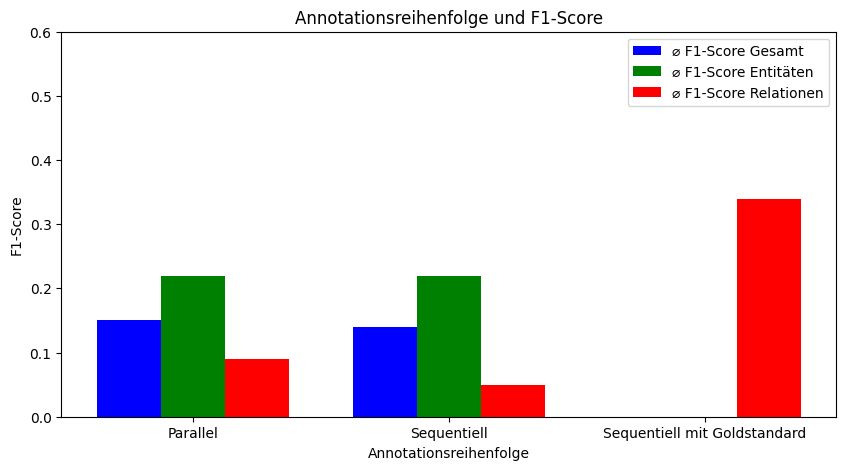

In [114]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Parallel', 'Sequentiell', 'Sequentiell mit Goldstandard']

total_values = [0.15, 0.14, 0]
entity_values = [0.22, 0.22, 0]
relation_values = [0.09, 0.05, 0.34]

bar_width = 0.25

r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 5))

plt.bar(r1, total_values, color='b', width=bar_width, label='⌀ F1-Score Gesamt')
plt.bar(r2, entity_values, color='g', width=bar_width, label='⌀ F1-Score Entitäten')
plt.bar(r3, relation_values, color='r', width=bar_width, label='⌀ F1-Score Relationen')

plt.xlabel('Annotationsreihenfolge')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.ylim((0, 0.6))

plt.ylabel('F1-Score')
plt.title('Annotationsreihenfolge und F1-Score')

plt.legend()

plt.savefig("vergleich_reihenfolge.png", dpi=700)

plt.show()
